**Importing librosa library**

In [13]:
import librosa
import os
import matplotlib.pyplot as plt
import librosa.display

**Loading the audio files**

AttributeError: '_process_plot_var_args' object has no attribute 'prop_cycler'

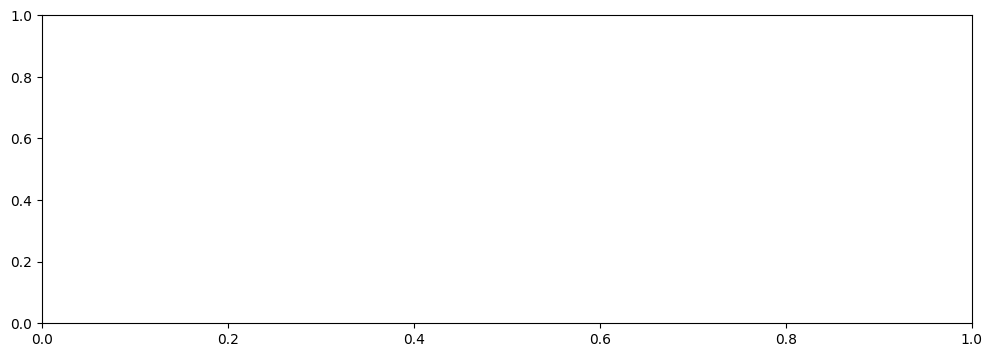

In [14]:
# Load an audio file

# Get the current working directory
current_directory = os.getcwd()

# Specify the path to the audio file relative to the current directory
audio_file_path = os.path.join(current_directory, 'Nicole-Documents', 'KAGGLE', 'AUDIO','REAL', 'biden-original.wav')
y, sr = librosa.load(audio_file_path)

# Display the waveform
plt.figure(figsize=(12, 4))
librosa.display.waveshow(y, sr=sr)
plt.title('Waveform')
plt.show()